In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [3]:
# file_paths = {
#     "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240824/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240825/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
# }
id_col = "accession_id"
file_paths = {
    #"msl128vs30_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"msl128vs30cls_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240902_224534.csv"),
    "ProstT5": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250107/uniref90/external/prostt5_bn_fnn_2l_d1024_lr3e-4.csv"),
    "ESM2-650M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250107/uniref90/external/esm2_t33_650M_UR50D_lr1e-4.csv"),
    "ESM2-3B": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250107/uniref90/external/esm2_t36_3B_UR50D_lr1e-4.csv"),
    # "ESM3": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20241205/sars-cov-2/unirprot/esm3/esm3_lr1e-4_tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert-2048": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240903_132845.csv"),
    #"VirProBert-msl1366": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240903/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_msl1366/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_CLS_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "VirProBERT": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250107/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64.csv")
}

In [4]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    index_seq_pred = df[df[id_col] == "YP_009724390.1"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

accession_id       Cat   Chicken  Chinese rufous horseshoe bat    Ferret  \
0      WBT62682.1  0.002287  0.054808                      0.911602  0.006866   
1      UDH75217.1  0.054513  0.001256                      0.010936  0.026948   
2      QTA98856.1  0.051066  0.005230                      0.273746  0.066039   
3      UZY40601.1  0.002341  0.056002                      0.909580  0.007547   
4      QTG64398.1  0.001767  0.049447                      0.920144  0.005243   
...           ...       ...       ...                           ...       ...   
5396   UDQ27380.1  0.008045  0.000004                      0.029776  0.008297   
5397   UJD35003.1  0.008820  0.000005                      0.337234  0.019797   
5398   UJD62197.1  0.123712  0.000007                      0.286445  0.028802   
5399   UIQ10892.1  0.062254  0.000009                      0.160295  0.026936   
5400   XHY94878.1  0.044892  0.000083                      0.072638  0.012014   

      Gray wolf  Horshoe bat     Human       Pig y_true pangolin_lineage  \
0      0.002135     0.014056  0.001645  0.006602  Human           BQ.1.1   
1      0.055784     0.024175  0.791521  0.034867  Human           AY.117   
2      0.019981     0.038806  0.532622  0.012511  Human          B.1.429   
3      0.002161     0.014051  0.001715  0.006603  Human           BQ.1.1   
4      0.001746     0.013040  0.001846  0.006767  Human          B.1.429   
...         ...          ...       ...       ...    ...              ...   
5396   0.001629     0.013243  0.932599  0.006407  Human           AY.100   
5397   0.003495     0.028620  0.586837  0.015193  Human            AY.75   
5398   0.005799     0.071076  0.477303  0.006856  Human        BA.1.1.18   
5399   0.004578     0.071857  0.666184  0.007886  Human          BA.1.20   
5400   0.007962     0.045472  0.815376  0.001562  Human         KP.3.1.1   

             geo_location  seq_length       model  Human_pred_diff  
0         USA: California        1268     ProstT5         0.000403  
1                     USA        1273     ProstT5         0.790279  
2      USA: Massachusetts        1273     ProstT5         0.531381  
3         USA: New Jersey        1268     ProstT5         0.000474  
4                 USA: TX        1273     ProstT5         0.000604  
...                   ...         ...         ...              ...  
5396  USA: North Carolina        1273  VirProBERT         0.191038  
5397    USA: Pennsylvania        1271  VirProBERT        -0.154725  
5398                  USA        1270  VirProBERT        -0.264259  
5399                  USA        1270  VirProBERT        -0.075377  
5400      USA: California        1268  VirProBERT         0.073815  

[21604 rows x 15 columns]

In [5]:
order = list(df["pangolin_lineage"].sort_values().unique())
order.remove("B")
order = ["B"] + order
order

['B',
 'AY.100',
 'AY.103',
 'AY.117',
 'AY.118',
 'AY.119',
 'AY.122',
 'AY.14',
 'AY.20',
 'AY.25',
 'AY.25.1',
 'AY.26',
 'AY.3',
 'AY.3.1',
 'AY.39',
 'AY.43',
 'AY.44',
 'AY.47',
 'AY.54',
 'AY.75',
 'B.1',
 'B.1.1.519',
 'B.1.1.7',
 'B.1.2',
 'B.1.427',
 'B.1.429',
 'B.1.526',
 'B.1.617.2',
 'B.1.637',
 'BA.1',
 'BA.1.1',
 'BA.1.1.18',
 'BA.1.15',
 'BA.1.18',
 'BA.1.20',
 'BA.2',
 'BA.2.12.1',
 'BA.2.3',
 'BA.2.9',
 'BA.4.1',
 'BA.4.6',
 'BA.5.1',
 'BA.5.2',
 'BA.5.2.1',
 'BA.5.5',
 'BA.5.6',
 'BF.10',
 'BQ.1',
 'BQ.1.1',
 'D.2',
 'HV.1',
 'JN.1',
 'KP.3.1.1',
 'P.1',
 'XBB.1.5']

In [6]:
models = list(df["model"].unique())
models

['ProstT5', 'ESM2-650M', 'ESM2-3B', 'VirProBERT']

In [13]:
def get_annotation(x):
    mean_val = np.mean(x)
    std_val = np.std(x)
    return "{:.2f}".format(mean_val) + "\n" + u"\u00B1" + "{:.2f}".format(std_val)
    
def get_annotation_df(heatmap_df, model_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    mean_std_df = model_df.groupby("pangolin_lineage").agg(lambda x: get_annotation(x))
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
        annot_df.loc[item[0], "Human"] = mean_std_df.loc[item[0], "Human"]
    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    return annot_df

/tmp/ipykernel_2817632/3051634058.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.92
±0.00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
/tmp/ipykernel_2817632/3051634058.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.00
±0.00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], "Human"] = mean_std_df.loc[item[0], "Human"]
/tmp/ipykernel_2817632/3051634058.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.64
±0.00' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item

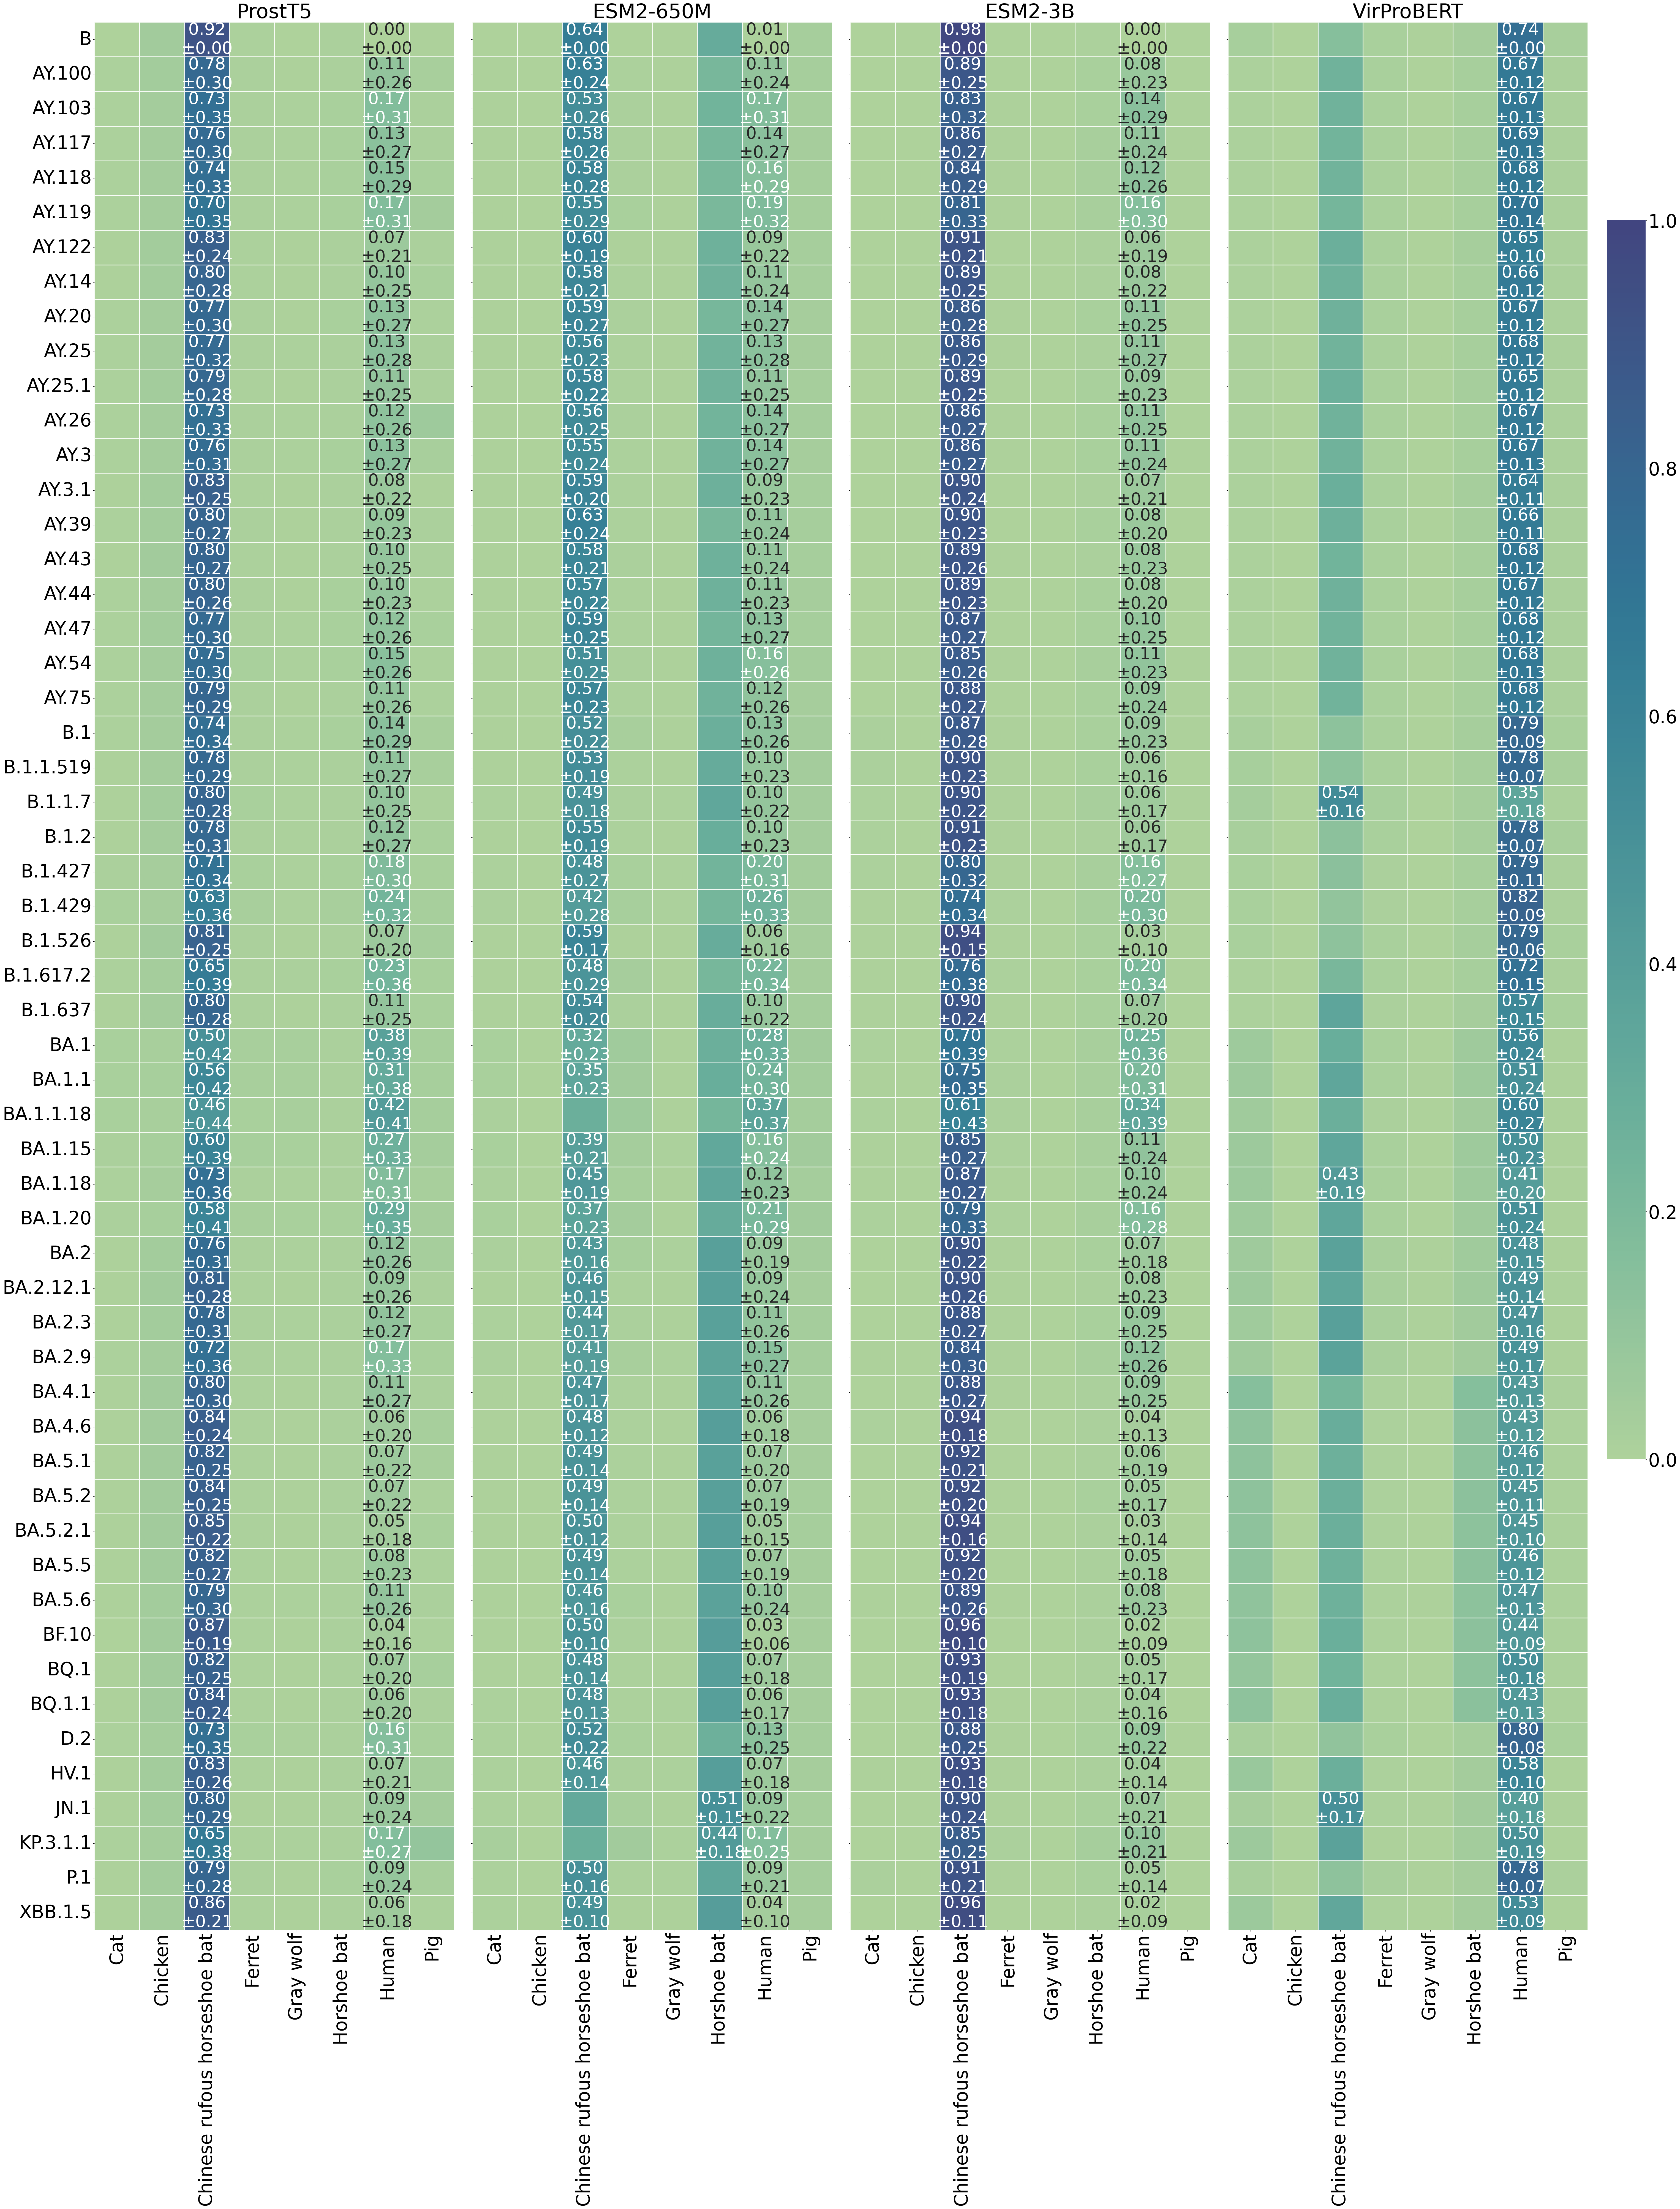

In [15]:
plt.rcParams['xtick.labelsize'] = 48
plt.rcParams['ytick.labelsize'] = 48
plt.rcParams.update({'font.size': 44})
fig, axs = plt.subplots(1, 4, figsize=(70, 90), sharex=False, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .02, .5])
for i, model in enumerate(models):
    model_df = df[df["model"] == model][["Cat", "Chicken", "Chinese rufous horseshoe bat", "Ferret", "Gray wolf", "Horshoe bat", "Human", "Pig", "pangolin_lineage"]].set_index("pangolin_lineage")
    heatmap_df = model_df.groupby("pangolin_lineage").agg("mean").reindex(order)
    
    
    sns.heatmap(heatmap_df, ax=axs[i], linewidth=2,
                annot=get_annotation_df(heatmap_df, model_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax,
                cmap="crest", alpha=.9)
    axs[i].set_title(model)
    axs[i].set(xlabel="", ylabel="")
plt.subplots_adjust(wspace=0.05)
# plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/sarscov2_variants_uniprot.pdf"), bbox_inches="tight")
plt.show()